**Author - Rahul Raj Pandey**

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#import libraries 
import tensorflow as tf
import keras
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications import VGG19

In [3]:
from PIL import Image
image = Image.open('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_1.jpeg')
numpydata = np.asarray(image)
numpydata.shape

(300, 300, 3)

In [4]:
#import train data
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,horizontal_flip = True,
                                   vertical_flip =  True , 
                                   rotation_range=60,validation_split=0.2)


train_data = train_datagen.flow_from_directory('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train',
                                                 target_size = (244, 244),
                                                 class_mode="categorical",subset="training",
                                               batch_size=8,
                                                 shuffle=False)
#import test data

test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory("../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test",
                                                           batch_size=8,
                                                           target_size=(244,244),
                                                           class_mode="categorical",
                                                           shuffle=True)
val_data = train_datagen.flow_from_directory('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train',
                                                           batch_size=8,
                                                           target_size=(244,244),
                                                           class_mode="categorical",
                                                           subset="validation",
                                                           shuffle=True)


Found 5307 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.


In [5]:
#build our model 
vgg_model =  VGG19(include_top=False , 
                   weights='imagenet',
                   input_shape=(244, 244,3),
                   classifier_activation = 'softmax',
                   pooling="max",
                   classes=2)
vgg_model.trainable= False
vgg_model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
______________________________________________________________

In [6]:
model = Sequential([
                                  vgg_model,
                                  layers.Dense(1000, activation = 'relu'),
                                  layers.Dense(500, activation = 'relu'),
                                  layers.Dropout(0.25),
                                  layers.Dense(100, activation = 'relu'),
                                  layers.Dense(2, activation = 'softmax') 
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1000)              513000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 21,088,186
Trainable params: 1,063,802
Non-trainable params: 20,024,384
____________________________________

In [8]:
#compile my model
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
#fit our model
history = model.fit(train_data,validation_data= val_data,epochs = 10,verbose=2)

Epoch 1/10
664/664 - 130s - loss: 0.7130 - accuracy: 0.5525 - val_loss: 0.6758 - val_accuracy: 0.5664
Epoch 2/10
664/664 - 102s - loss: 0.6774 - accuracy: 0.5585 - val_loss: 0.6870 - val_accuracy: 0.5664
Epoch 3/10
664/664 - 103s - loss: 0.4537 - accuracy: 0.7547 - val_loss: 0.2437 - val_accuracy: 0.9163
Epoch 4/10
664/664 - 103s - loss: 0.2588 - accuracy: 0.8956 - val_loss: 0.1800 - val_accuracy: 0.9329
Epoch 5/10
664/664 - 103s - loss: 0.2254 - accuracy: 0.9082 - val_loss: 0.1582 - val_accuracy: 0.9367
Epoch 6/10
664/664 - 103s - loss: 0.1797 - accuracy: 0.9325 - val_loss: 0.1580 - val_accuracy: 0.9397
Epoch 7/10
664/664 - 104s - loss: 0.1641 - accuracy: 0.9403 - val_loss: 0.1575 - val_accuracy: 0.9442
Epoch 8/10
664/664 - 104s - loss: 0.1579 - accuracy: 0.9354 - val_loss: 0.2965 - val_accuracy: 0.8876
Epoch 9/10
664/664 - 103s - loss: 0.1569 - accuracy: 0.9410 - val_loss: 0.1230 - val_accuracy: 0.9593
Epoch 10/10
664/664 - 104s - loss: 0.1342 - accuracy: 0.9520 - val_loss: 0.1634 - 

In [10]:
#evulate model 
model.evaluate(test_data)

90/90 [==============================] - 6s 62ms/step - loss: 0.1114 - accuracy: 0.9552


[0.11138003319501877, 0.955244779586792]

In [11]:
#predict test data
y_prediction =  model.predict(test_data)
y_prediction =  np.argmax(y_prediction,axis = 1 )

print(y_prediction)

[1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 

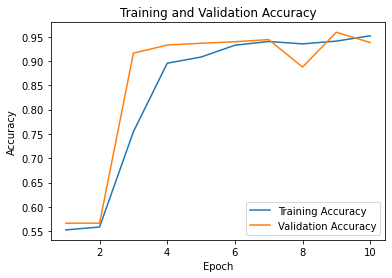

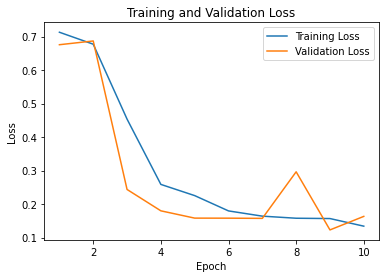

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
classes_labels = {0:"def_front",1:"ok_front"}

Predicted- [0]
def_front


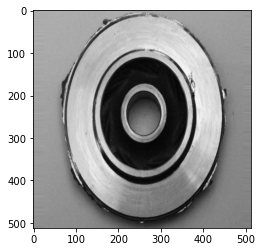

In [14]:
# test Example 1    Actual - Defected 
import cv2
image_path = "../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front/cast_def_0_1055.jpeg"
img= cv2.imread(image_path)
img=cv2.resize(img, (244, 244))
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print("Predicted-",prediction)
print(classes_labels[prediction[0]])

plt.imshow(cv2.imread(image_path))

Predicted- [1]
ok_front


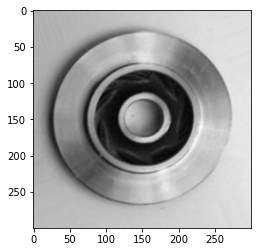

In [15]:
#test_example 2  Actual - Not Defected 
image_path = "../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_1016.jpeg"
img= cv2.imread(image_path)
img=cv2.resize(img, (244, 244))
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print("Predicted-",prediction)
print(classes_labels[prediction[0]])

plt.imshow(cv2.imread(image_path))

Predicted- [0]
def_front


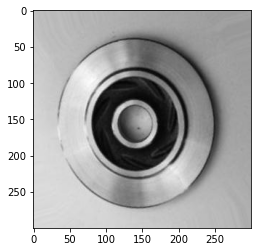

In [16]:
#test_example 3    Actual - Not Defected 
image_path = "../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_1019.jpeg"
img= cv2.imread(image_path)
img=cv2.resize(img, (244, 244))
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print("Predicted-",prediction)
print(classes_labels[prediction[0]])

plt.imshow(cv2.imread(image_path))

Predicted- [0]
def_front


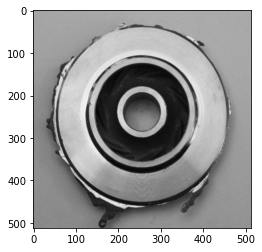

In [17]:
#test_example 4   Actual - Defected 
image_path = "../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front/cast_def_0_1188.jpeg"
img= cv2.imread(image_path)
img=cv2.resize(img, (244, 244))
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print("Predicted-",prediction)
print(classes_labels[prediction[0]])

plt.imshow(cv2.imread(image_path))

In [18]:
# to save model
model.save("task_model_casting.h5") 